In [1]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import random
import numpy as np
from functions_extra import visualize_results_usual_yolo_inference, get_crops

## Визаулизация классического инференса:

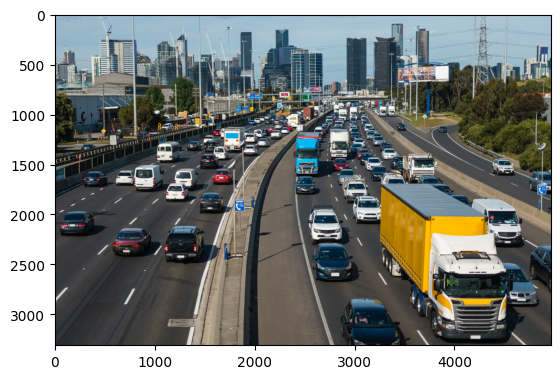

In [2]:
img_path = 'test_images/image-test.jpg'
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB));

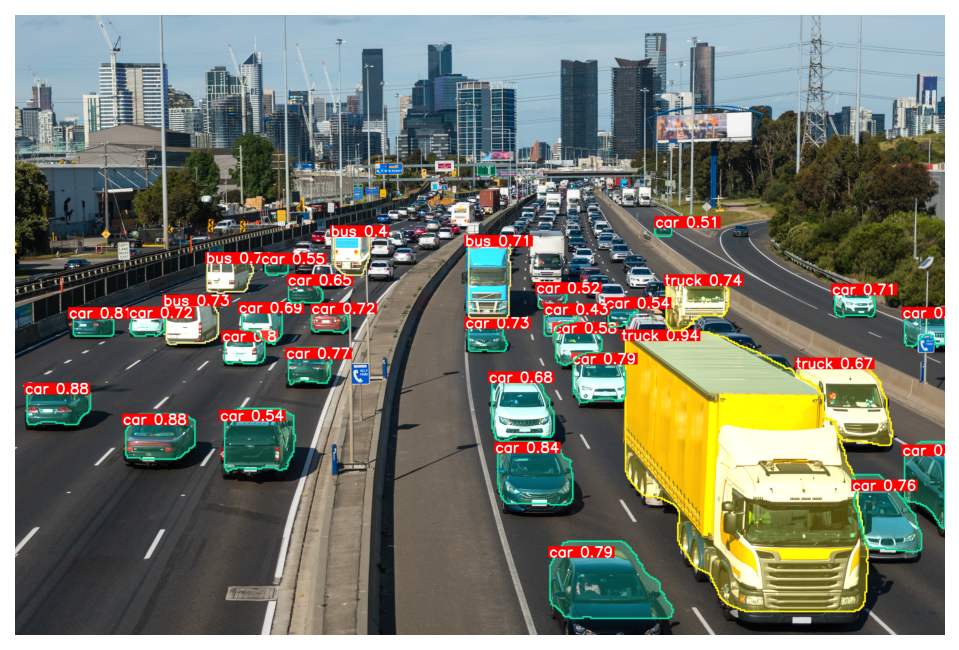

In [6]:
# Define the parameters
imgsz = 640
conf = 0.4
iou = 0.7  

# Load the YOLOv8 model
model = YOLO('yolov8m-seg.pt')  # Make sure the model file is in the correct path

visualize_results_usual_yolo_inference(img, model, imgsz, conf, iou, segment=True, delta_colors=3, thickness=8, font_scale=2.5,
                                       show_boxes=False, fill_mask=True, alpha=0.3, random_object_colors=False, show_confidences=True)

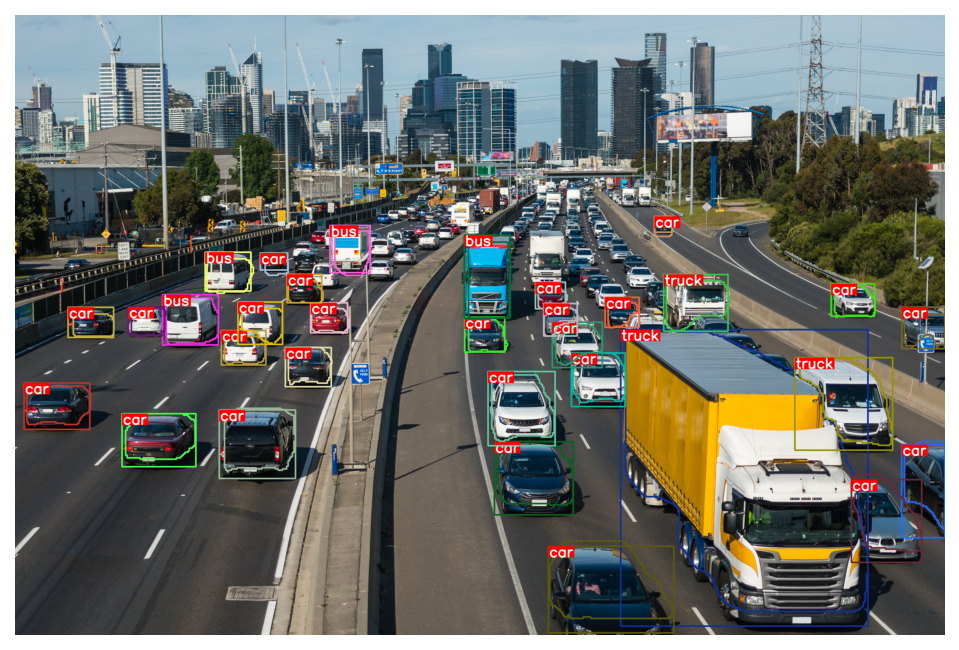

In [8]:
visualize_results_usual_yolo_inference(img, model, imgsz, conf, iou, segment=True, delta_colors=3, thickness=8, font_scale=2.5,
                                       show_boxes=True, fill_mask=False, alpha=0.4, random_object_colors=True, show_confidences=False)

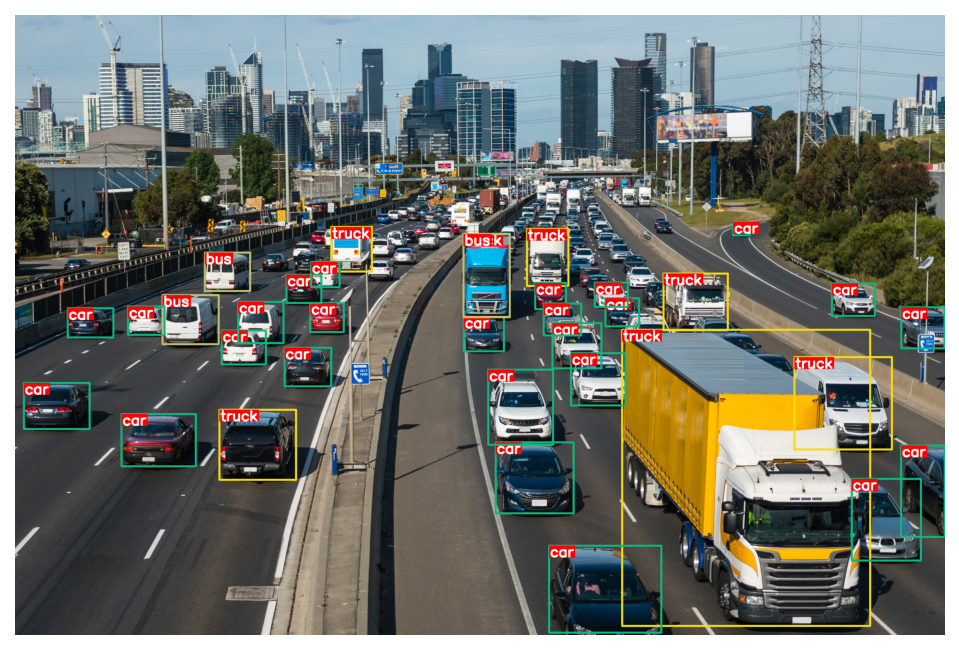

In [10]:
# Load the YOLOv8 model
model = YOLO('yolov8l.pt')  # Make sure the model file is in the correct path

# Load the image (replace 'path_to_your_image.jpg' with the actual path to your image)
img_path = 'test_images/image-test.jpg'
img = cv2.imread(img_path)

visualize_results_usual_yolo_inference(img, model, imgsz, conf, iou, segment=False, delta_colors=3,
                                       thickness=9, font_scale=2.5, show_boxes=True, random_object_colors=False, show_confidences=False)

---

## Нарезка на кропы с переналожением:

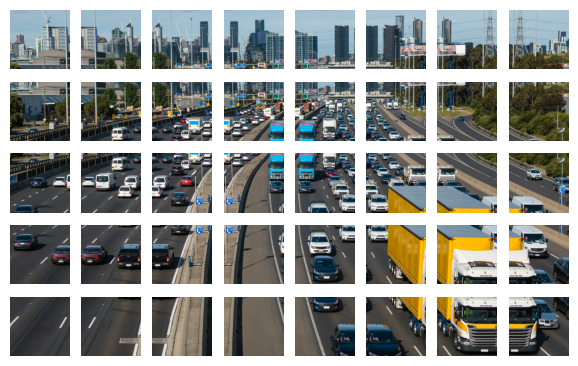

Number of generated images: 40


In [11]:
image = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)
data_all_crops = get_crops(image, shape_x=800, shape_y=800,
                   overlap_x=30, overlap_y=30, show=True)

In [12]:
np.array(data_all_crops).shape

(40, 800, 800, 3)

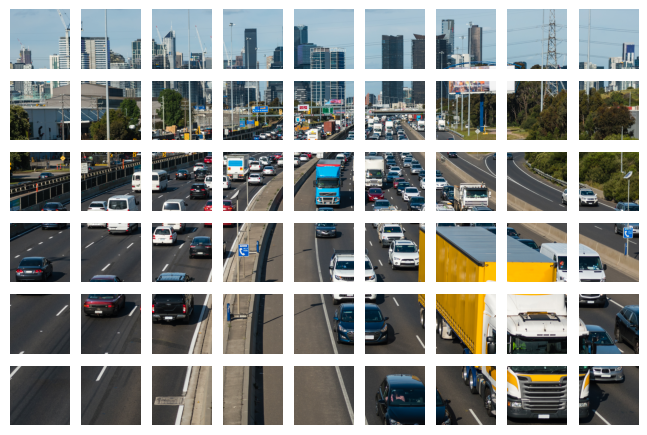

Number of generated images: 54


In [13]:
data_all_crops = get_crops(image, shape_x=500, shape_y=500,
                   overlap_x=0, overlap_y=0, show=True)

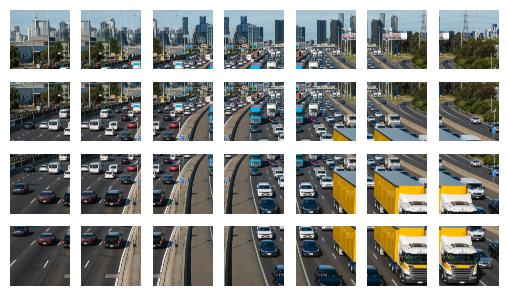

Number of generated images: 28


In [14]:
data_all_crops = get_crops(image, shape_x=1200, shape_y=1200,
                   overlap_x=50, overlap_y=50, show=True)

Пример одного кропа:

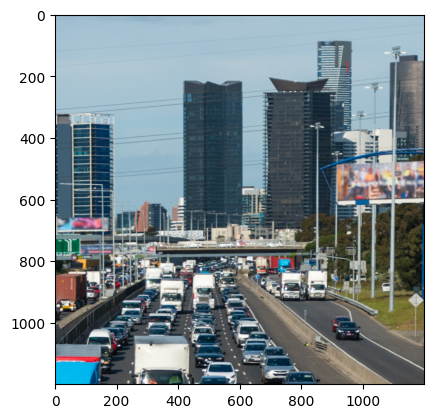

In [15]:
plt.imshow(data_all_crops[4]);

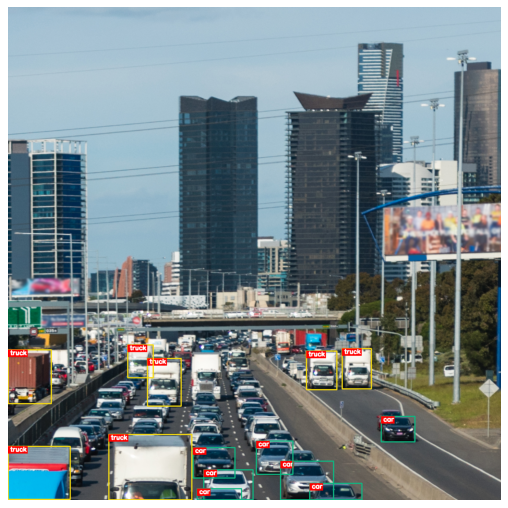

In [17]:
visualize_results_usual_yolo_inference(cv2.cvtColor(data_all_crops[4].copy(), cv2.COLOR_BGR2RGB), model, imgsz, conf,
                                       iou, delta_colors=3, thickness=2, font_scale=0.5, dpi=80)